In [1]:
#
# Created on Mon Dec 14 16:26:46 2015
# 
# @author: jrose01
# Modified by: mcolosso
#

In [2]:
%matplotlib inline

from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

#pd.set_option('display.float_format', lambda x:'%.3f'%x)
#pd.set_option('display.mpl_style', 'default')   # --deprecated
#plt.style.use('ggplot')   # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
#os.chdir("C:/Users/MColosso/Documents/CURSOS/Wesleyan University/Machine Learning for Data Analysis")

In [4]:
#
# Data Engineering and Analysis
#

In [5]:
#Load the dataset

loans = pd.read_csv("./LendingClub.csv", low_memory = False)

# LendingClub.csv is a dataset taken from The LendingClub (https://www.lendingclub.com/)
# which is a peer-to-peer leading company that directly connects borrowers and potential
# lenders/investors

In [6]:
#
# Exploring the target column
#

In [7]:
# The target column (label column) of the dataset that we are interested in is called
# `bad_loans`. In this column **1** means a risky (bad) loan **0** means a safe  loan.
#
# In order to make this more intuitive, we reassign the target to be:
# * ** 1 ** as a safe  loan, 
# * ** 0 ** as a risky (bad) loan. 
#
# We put this in a new column called `safe_loans`.

loans['safe_loans'] = loans['bad_loans'].apply(lambda x : 1 if x == 0 else 0)
loans.drop('bad_loans', axis = 1, inplace = True)

In [8]:
# Select features to handle

predictors = ['grade',                     # grade of the loan
              'sub_grade',                 # sub-grade of the loan
              'short_emp',                 # one year or less of employment
              'emp_length_num',            # number of years of employment
              'home_ownership',            # home_ownership status: own, mortgage or rent
              'dti',                       # debt to income ratio
              'purpose',                   # the purpose of the loan
              'term',                      # the term of the loan
              'last_delinq_none',          # has borrower had a delinquincy
              'last_major_derog_none',     # has borrower had 90 day or worse rating
              'revol_util',                # percent of available credit being used
              'total_rec_late_fee',        # total late fees received to day
             ]

target = 'safe_loans'                      # prediction target (y) (+1 means safe, 0 is risky)

# Extract the predictors and target columns
loans = loans[predictors + [target]]

# Delete rows where any or all of the data are missing
data_clean = loans.dropna()

In [9]:
# Convert categorical variables into binary variables

data_clean = pd.get_dummies(data_clean, prefix_sep = '=')

In [10]:
(data_clean.describe()).T

,count,mean,std,min,25%,50%,75%,max
short_emp,122607.0,0.123672,0.329208,0.0,0.00,0.00,0.00,1.00
emp_length_num,122607.0,6.370256,3.736014,0.0,3.00,6.00,11.00,11.00
dti,122607.0,15.496888,7.497442,0.0,9.88,15.26,20.85,39.88
last_delinq_none,122607.0,0.588115,0.492177,0.0,0.00,1.00,1.00,1.00
last_major_derog_none,122607.0,0.873906,0.331957,0.0,1.00,1.00,1.00,1.00
revol_util,122607.0,53.716307,25.723881,0.0,34.80,55.70,74.30,150.70
total_rec_late_fee,122607.0,0.742344,5.363268,0.0,0.00,0.00,0.00,208.82
safe_loans,122607.0,0.811185,0.391363,0.0,1.00,1.00,1.00,1.00
grade=A,122607.0,0.181996,0.385843,0.0,0.00,0.00,0.00,1.00
grade=B,122607.0,0.303180,0.459634,0.0,0.00,0.00,1.00,1.00


In [11]:
# Extract new features names

features = data_clean.columns.values
features = features[features != target]

In [12]:
#
# Modeling and Prediction
#

In [13]:
predvar    = data_clean[features]
predictors = predvar.copy()
target     = data_clean.safe_loans

In [14]:
# Standardize predictors to have mean=0 and sd=1

from sklearn import preprocessing
for attr in predictors.columns.values:
    predictors[attr] = preprocessing.scale(predictors[attr].astype('float64'))

In [15]:
#Split into training and testing sets

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size = .4,
                                                              random_state = 123)

print('pred_train.shape', pred_train.shape)
print('pred_test.shape',  pred_test.shape)
print('tar_train.shape',  tar_train.shape)
print('tar_test.shape',   tar_test.shape)

pred_train.shape (73564, 67)
pred_test.shape (49043, 67)
tar_train.shape (73564,)
tar_test.shape (49043,)


In [16]:
# Specify the lasso regression model

model = LassoLarsCV(cv = 10, precompute = False).fit(pred_train, tar_train)

In [17]:
# Print variable names and regression coefficients

pd.DataFrame([dict(zip(predictors.columns, model.coef_))], index=['coef']).T

,coef
dti,-0.031080
emp_length_num,0.000000
grade=A,0.036706
grade=B,0.015090
grade=C,0.000000
grade=D,-0.014125
grade=E,-0.017393
grade=F,-0.015787
grade=G,-0.009659
home_ownership=MORTGAGE,0.010588


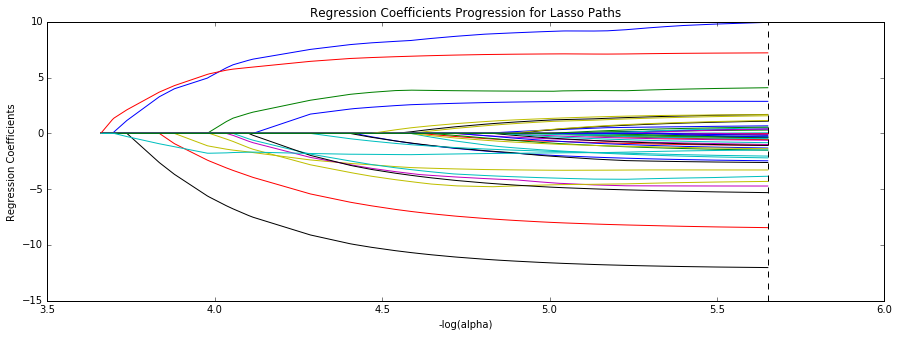

In [18]:
# Plot coefficient progression

m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle = '--', color = 'k',
            label = 'alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

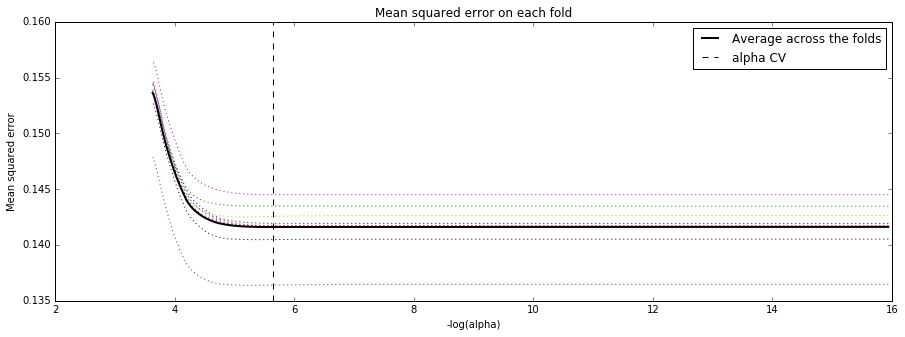

In [19]:
# Plot mean square error for each fold

m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis = -1), 'k',
         label = 'Average across the folds', linewidth = 2)
plt.axvline(-np.log10(model.alpha_), linestyle = '--', color = 'k',
            label = 'alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [20]:
# MSE from training and test data

from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.141354906717
test data MSE
0.140656085708


In [21]:
# R-square from training and test data

rsquared_train = model.score(pred_train, tar_train)
rsquared_test  = model.score(pred_test, tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.0799940399148
test data R-square
0.0772929635462
